<img src='https://raw.githubusercontent.com/ItaiAviad/FiguraAI/main/images/logo.png' />

# <h1 style="font-size: 52px; text-align: center;"><font size=7>FiguraAI</font></h1>
<div dir="rtl">
<font size=5 >
איתי אביעד
<br>
בסמת החדש, חיפה
</font>
</div>

<font size=5>
<h3 style="text-align: center;" >מטרת המחקר</h3>
<div dir="rtl">
מטרת המחקר היא לעזור לילדים ולאנשים עם בעיות למידה ללמוד צורות שונות על ידי זיהוי צורה שצוירה בכתב יד. 
<br>
המשתמש יצייר צורה באפליקצייה במכשיר הנייד שלו, ויוכל ללמוד על צורות גיאומטריות שונות.
<br><br>
השם FiguraAI הוא שילוב של המילה הלטינית "Figura" שמשמעותה "צורה", והמילה "AI" שמשמעותה "אינטיליגנציה מלאכותית".
</div>
</font>


# <font size=5><h1 dir='rtl' style='text-align: center;' >דאטה סט</h1>

<div dir="rtl">
שם: <strong>Hand-drawn Shapes (HDS) Dataset</strong>
<br>קישור: <u><a href='https://www.kaggle.com/datasets/frobert/handdrawn-shapes-hds-dataset' >https://www.kaggle.com/datasets/frobert/handdrawn-shapes-hds-dataset</a></u>
<br>יוצר: Francois Robert
<br><br>

הדאטה סט כולל תמונות של צורות הכוללות מרובעים, אליפסות ומשולשים, וקבצי <code>csv.</code> עם קודקודי הצורות.
<br><br>
בדאטה סט ישנם 47.3 אלף קבצים (60 MB סך הכל):
<br>
    <ul>
        <li>27.3 אלף קבצי <code>png.</code></li>
        <li>20.0 אלף קבצי <code>csv.</code></li>
    </ul>


<code>png.</code> :
<br>תמונות של צורות שונות המצוירות בכתב יד בסגנונות שונים.
<br><br>
<code>csv.</code> :
<br>כולל קואורדינטות יחסיות של קודקודי הצורות בתמונה מסויימת. קואורדינטות יחסיות הן קואורדינטות של נקודה שהן האחוז מכלל הפיקסלים. הן נעות בין 0 ל 1.
<br>לדוגמה: אם בתמונה יש 70 פיקסלים וערך ה x של קואורדינטה הוא 0.1, כלומר 10%, ערך ה x יהיה בפיקסל ה 7.
<br>כל קובץ csv כולל 4 זוגות של קואורדינטות (x,y) יחסיות. הזוגות מסודרים בכיוון השעון מלמעלה עד שמאלה (למעלה, ימינה, למטה, שמאלה).
<br>

קואורדינטות יחסיות לדוגמה:
</div>
</font>

![Relative cordinates example](https://raw.githubusercontent.com/ItaiAviad/FiguraAI/main/images/vertices.png)

<font size=5>><div dir="rtl">יבוא כל המידע מה Github של הפרויקט</div></font>

In [ ]:
!git clone https://github.com/ItaiAviad/FiguraAI.git

<font size=5><div dir="rtl" >יבוא הספריות הנחוצות</div></font>

In [275]:
# Import all the necessary libraries
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

# <font size=5><h1 dir='rtl' style='text-align: center;' >חקר נתונים</h1></font>



### <font size=5><h3 dir='rtl' style='text-align: center;' >יצירת קובץ CSV חדש וטעינת נתונים</h3>

<div dir='rtl' >בחלק הזה, סידרתי את כל קבצי ה <code>csv.</code> לקובץ <code>csv.</code> אחד משולב.</div>

<div dir='rtl' >
<h4><strong>הערה חשובה:</strong></h4>
בשביל  להריץ את קוד היצירה של קובץ ה <code>csv.</code> החדש (שלושת הבלוקים הבאים), יש להוריד את קבצי הדאטה סט מדף הדאטה סט ב kaggle.com (נמצע בקישור הנ"ל), או להוריד את התיקייה בשם <code>data</code> הנמצאת בספריית ה github של פרוייקט זה.
<br>
כמו כן, יש למקם את תיקיית ה data באותה התיקייה כמו את קובץ ה <code>ipynb.</code> הזה. 
</div>
</font>

In [315]:
# Get all the directories of the .png and .csv files
directories = [name for name in os.listdir("./data")] # All the subdirectories of the current directory
shapes = ['ellipse', 'rectangle', 'triangle']
labels = [0, 1, 2]
print(directories)

['user.aly', 'user.crt', 'user.drt', 'user.elu', 'user.frt', 'user.if1', 'user.if2', 'user.if3', 'user.if5', 'user.if8', 'user.il1', 'user.ilb', 'user.im1', 'user.lrt', 'user.lt1', 'user.lts', 'user.mrt', 'user.nae', 'user.nld', 'user.u01', 'user.u02', 'user.u03', 'user.u04', 'user.u05', 'user.u06', 'user.u07', 'user.u08', 'user.u09', 'user.u10', 'user.u11', 'user.u12', 'user.u13', 'user.u14', 'user.u17', 'user.u18', 'user.u19', 'user.vly']


<font size=5><div dir="rtl" >הוספת הכותרות לעמודות ב CSV</div></font>

In [14]:
# Add the columns names to the csv file
with open('cords.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # Write the first row to the cords.csv file (the column names row)
    columns = ['label', 'topX', 'topY', 'rightX', 'rightY', 'bottomX', 'bottomY', 'leftX', 'leftY' ]
    writer.writerow(columns)

<font size=5><div dir="rtl">איחוד כל קבצי ה CSV הקטנים בתיקיות לקובץ CSV אחד גדול</div></font>

In [16]:
# Combine all the different csv files to the new cords.csv file
with open('cords.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    for folder in directories:
        for shape in shapes:
            labal = shape
            
            if(os.path.exists(f'./data/{folder}/vertices/{shape}')):
                csv_files = os.listdir(f'./data/{folder}/vertices/{shape}')

                for file in csv_files:
                    data = pd.read_csv(f'./data/{folder}/vertices/{shape}/{file}')

                    try:
                        # Take the data from the small .csv file and put it in the big and combined .csv file
                        # Turn the values from multiple rows to one row
                        data = pd.DataFrame(np.vstack([data.columns, data])).astype('float')
                        data = np.insert(data.values, 0, shapes.index(shape))

                        # Write the values to the cords.csv file
                        writer.writerow(data)
                    except ValueError:
                        continue

### <font size=5><h3 dir='rtl' style='text-align: center;' >קריאת הנתונים המסודרים</h3>

<div dir='rtl' >
<h4><strong>הערה חשובה:</strong></h4>
כדי להריץ את כל הקוד למטה, צריך להוריד את קובץ ה <code>csv.</code> מספריית ה github של פרוייקט זה הנקרא <code>cords.csv</code>, ולשים אותו באותה התיקייה עם קובץ ה <code>ipynb.</code> הזה.
</div></font>

In [313]:
# Load the created cords.csv file (dataset) 
cords = pd.read_csv("./cords.csv")
# Display the first few rows of the cords DataFrame
cords.head()

# 0.0 = ellipse
# 1.0 = rectangle
# 2.0 = triangle

,label,topX,topY,rightX,rightY,bottomX,bottomY,leftX,leftY
0,0.0,0.49,0.11,0.60,0.50,0.49,0.88,0.40,0.49
1,0.0,0.49,0.11,0.76,0.49,0.49,0.87,0.22,0.49
2,0.0,0.11,0.52,0.48,0.31,0.89,0.48,0.51,0.69
3,0.0,0.49,0.11,0.66,0.48,0.51,0.88,0.33,0.49
4,0.0,0.50,0.11,0.83,0.49,0.50,0.88,0.17,0.49


<font size=5><div dir="rtl">דוגמאות לשורות עם label שונים מתוך ה dataset</div></font>

In [314]:
# Show examples of different shape values
cords[0:201:50]

,label,topX,topY,rightX,rightY,bottomX,bottomY,leftX,leftY
0,0.0,0.49,0.11,0.60,0.50,0.49,0.88,0.40,0.49
50,0.0,0.11,0.54,0.49,0.41,0.88,0.46,0.51,0.59
100,1.0,0.17,0.38,0.80,0.38,0.78,0.62,0.15,0.62
150,2.0,0.23,0.83,0.44,0.08,0.76,0.87,0.23,0.83
200,2.0,0.16,0.35,0.86,0.17,0.55,0.84,0.16,0.35


<font size=5><div dir="rtl">מידע על ה dataset/dataframe ועל העמודות והערכים בו</div></font>

In [294]:
# A summary of the cords DataFrame including information about the columns, data-types non-null count and memory usage.
cords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20576 entries, 0 to 20575
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    20576 non-null  float64
 1   topX     20576 non-null  float64
 2   topY     20576 non-null  float64
 3   rightX   20576 non-null  float64
 4   rightY   20576 non-null  float64
 5   bottomX  20576 non-null  float64
 6   bottomY  20576 non-null  float64
 7   leftX    20576 non-null  float64
 8   leftY    20576 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<font size=5><div dir="rtl">
מידע סטטיסטי על הדאטה סט:
<br>
count - כמות הערכים בכל עמודה
<br>
mean - הממוצע של הערכים בכל עמודה
<br>
std - סטיית התקן בכל עמודה שמייצגת את פיזור הנתונים סביב הממוצע שלהם
<br>
min - הערך המינימלי בכל עמודה
<br>
25% - האחוזון ה 25 בכל עמודה
<br>
50% - החציון הוא האחוזון ה 50 בכל עמודה
<br>
75% - האחוזון ה 75 בכל עמודה
<br>
max - הערך המקסימלי בכל עמודה
</div></font>

In [296]:
# Statistics about the columns in the cords DataFrame
cords.describe()

,label,topX,topY,rightX,rightY,bottomX,bottomY,leftX,leftY
count,20576.000000,20576.000000,20576.000000,20576.000000,20576.000000,20576.000000,20576.000000,20576.000000,20576.000000
mean,1.005783,0.214668,0.597489,0.441788,0.285819,0.772637,0.500579,0.456798,0.685052
std,0.810092,0.121137,0.187319,0.224853,0.132142,0.132308,0.214944,0.257824,0.144722
min,0.000000,0.000000,0.050000,0.010000,0.020000,0.030000,0.050000,0.000000,0.050000
25%,0.000000,0.120000,0.500000,0.240000,0.160000,0.700000,0.350000,0.190000,0.590000
50%,1.000000,0.160000,0.600000,0.470000,0.290000,0.830000,0.490000,0.490000,0.680000
75%,2.000000,0.290000,0.740000,0.560000,0.390000,0.870000,0.650000,0.650000,0.820000
max,2.000000,0.880000,0.990000,0.950000,0.950000,0.990000,0.960000,0.960000,0.990000


<font size=5><div dir="rtl">מספר הערכים הכולל של כל label ב dataset</div></font>

In [298]:
# The count of each label out of all the labels
cords['label'].value_counts()

# 0.0 = ellipse
# 1.0 = rectangle
# 2.0 = triangle

1.0    7073
2.0    6811
0.0    6692
Name: label, dtype: int64

<font size=5><div dir="rtl">מספר הערכים היחודיים בכל עמודה</div></font>

In [299]:

# The number of unique values in each column in the cords DataFrame
cords.nunique()

label       3
topX       88
topY       94
rightX     94
rightY     89
bottomX    94
bottomY    91
leftX      95
leftY      94
dtype: int64

### <font size=5><h3 dir='rtl' style='text-align: center;' >ויזואליזציה של הנתונים</h3></font>

<font size=5><div dir='rtl' >
ספירת ערכים ייחודיים לכל קואורדינטה יחסית.
<br>
כל צבע מייצג ערכי x או y שונים.
</div></font>

Text(0.5, 9.444444444444438, 'Relative coordinate')

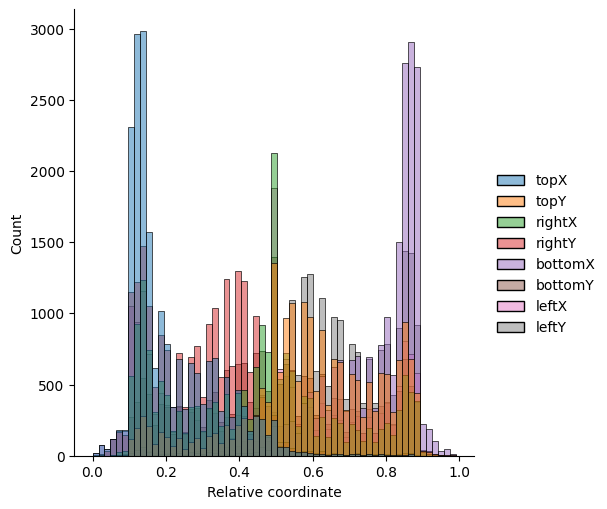

In [301]:
'''
Count of unique values per relative coordinate.
Each color represents different x or y values.
'''

sns.displot(cords.iloc[:, 1:]) # All values, column 1-8
plt.xlabel("Relative coordinate")

<font size=5><div dir='rtl' >
ספירה של כל סוג צורה שונה בדאטה סט.
</div></font>

Text(0.5, 9.444444444444438, 'Shape')

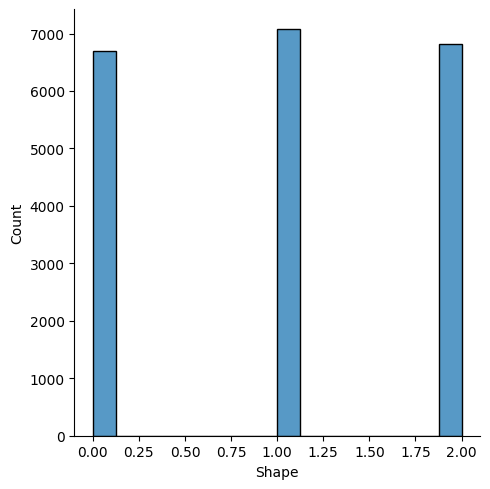

In [300]:
'''
Count of each shape in the dataset.

0.0 = ellipse
1.0 = rectangle
2.0 = triangle
'''

sns.displot(cords.iloc[:, 0]) # All values, column 0
plt.xlabel("Shape")

<font size=5><div dir='rtl' >
הגרפים מציגים את טווח ערכי ה x או ה y (leftX ו leftY במקרה הזה) לכל צורה.
<br>
המלבן השחור בלמעלה מייצג את טווח הנתנוים בצורה המסויימת, וסוף הבר מייצג את ממוצע הנתונים.
</div></font>

<AxesSubplot:xlabel='label', ylabel='leftY'>

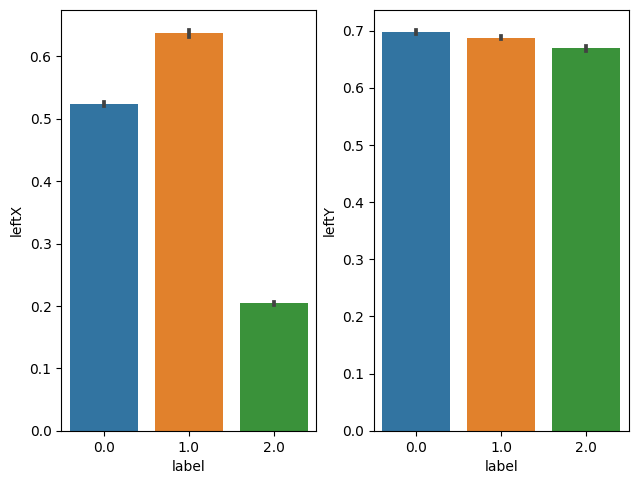

In [302]:
'''
These plots represent the range of x or y values (leftX and leftY in this case) per each shape.
The black rectangle on top represents the range of values of a specific shape,
and the end of the bar represents the mean value.
'''

f, axes = plt.subplots(1, 2)
f.tight_layout() # Spacing between plots
sns.barplot(x=cords['label'], y=cords['leftX'], ax=axes[0])
sns.barplot(x=cords['label'], y=cords['leftY'], ax=axes[1])

<font size=5><div dir='rtl' >
מייצג ערכי מידע שונים לגבי כל ערכי ה x וה y:
<br>25%, חציון , 75%, מינימום, מקסימום, חריגים
<br>
חריג - נקודת  מידע ששונה באופן משמעותי משאר הנתונים.
</div></font>

<AxesSubplot:>

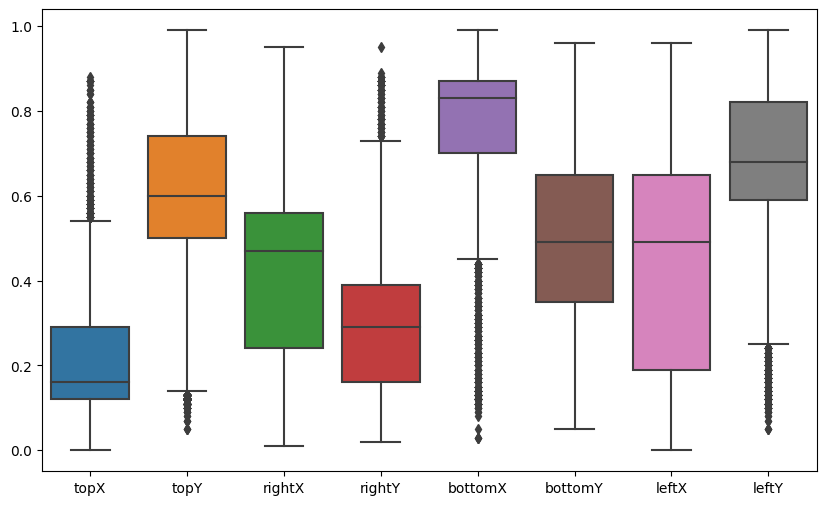

In [303]:
'''
Represents different information about each x or y value:
25%, 50%, 75%, min, max, outliers
Outlier - A data point that differs significanly from most of the values.
'''

plt.figure(figsize=(10, 6))
sns.boxplot(data=cords.iloc[:, 1:])

<font size=5><div dir='rtl' >
גרף הפיזור מציג את פריסת הנתונים ביחד לשני נתונים.
<br>
במקרה הזה, כל נקודה מייצגת צורה שונה מהדאטה סט על פי ערכי ה bottomX וה bottomY שלה.
<br>
הגרף מבדיל בין סוגי צורות באמצעות צביעת נקודות המידע בצבעים שונים על פי התג שלהם.
</div></font>

Text(0, 0.5, 'bottomY')

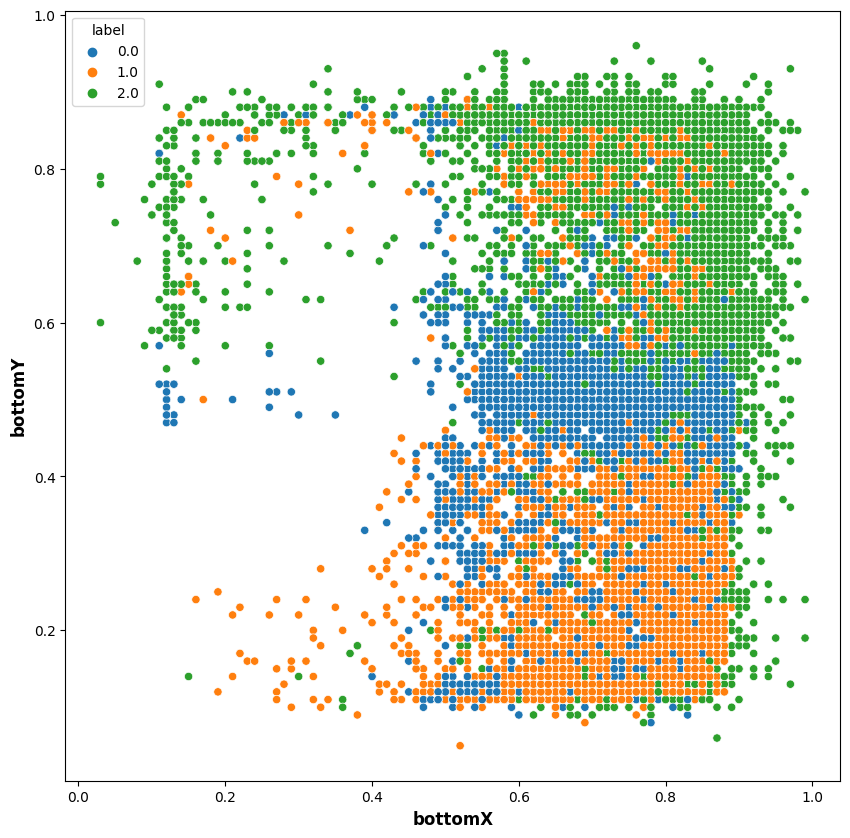

In [304]:
'''
Scatter plot represents the spread of data by 2 values.
In this case, each dot represents a different shape from the dataset by its bottomX and bottomY values.
The plot differentiates data points according to a hue assigned to each label.

0.0 = ellipse = blue
1.0 = rectangle = orange
2.0 = triangle = green
'''

plt.figure(figsize=(10, 10))
sns.scatterplot(x=cords['bottomX'], y=cords['bottomY'], hue=cords['label'], palette=["C0", "C1", "C2"])
plt.xlabel("bottomX", fontsize=12, fontweight='bold')
plt.ylabel("bottomY", fontsize=12, fontweight='bold')

# <font size=5><h1 dir='rtl' style='text-align: center;' >למידת מכונה</h1></font>

### <font size=5><h3 dir='rtl' style='text-align: center;' >חלוקת הנתונים ל train ו test</h3></font>

<font size=5><div dir="rtl">הדספת המבנה של ה labels לעומת המידע</div></font>

In [4]:
# Spliting to Lables and Values
X = cords.drop(['label'], axis=1).to_numpy()
y = cords['label'].to_numpy()
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20576, 8)
y shape: (20576,)


<font size=5><div dir="rtl">חלוקת הנתונים ל train ו test ול labels ומידע</div></font>

In [307]:
# Spliting to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train:\n\tX:", X_train.shape, "\n\ty:", y_train.shape)
print("test: \n\tX:" , X_test.shape, "\n\ty:", y_test.shape)

train:
	X: (16460, 8) 
	y: (16460,)
test: 
	X: (4116, 8) 
	y: (4116,)


## <font size=5><h2 dir='rtl' style='text-align: center;' >אימון אלגוריתם KNN</h2></font>

<font size=5><div dir="rtl">מציאת הפרמטרים הטובים ביותר ואימון המודל KNN</div></font>

In [309]:
# Training the model by the best hyper-parameteres found
KNN = KNeighborsClassifier()
# The parameters to choose the best from
grid_params = {'n_neighbors': [5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'p': [2, 3, 4]}
# Search the best parameteres out of the grid_params dictionary
KNN = GridSearchCV(KNN, grid_params, cv=3, verbose=0)
KNN.fit(X_train, y_train)

# Take the best parameters found
best_n_neighbors = KNN.best_params_['n_neighbors']
best_weights = KNN.best_params_['weights']
best_metric = KNN.best_params_['metric']
best_p = KNN.best_params_['p']

# Train the model again but with the best parameters found
KNN = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, metric=best_metric, p=best_p)
KNN.fit(X_train, y_train)

# Hyper Parameters - KNN
# n_neighbors: Specifies the number of neighbors considered for classification.
# weights: Determines the weight assigned to each neighbor during prediction
# metric: Defines the distance metric used to calculate the distance between samples.
# p: Only relevant for the 'minkowski' metric and represents the power parameter

C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

KNeighborsClassifier(p=4, weights='distance')

### <font size=5><h3 dir='rtl' style='text-align: center;' >בחינת ביצועים</h3></font>

In [310]:
# Accuracy Score Test
knn_score = KNN.score(X_test, y_test)
print(f"KNN Accuracy Score: {knn_score} ({knn_score * 100:.4f}%)")

KNN Accuracy Score: 0.9956268221574344 (99.5627%)


<font size=5><div dir="rtl">מטריצת בלבול למודל KNN</div></font>

In [259]:
# Confusion matrix test
knn_y_train_pred = KNN.predict(X_train)
knn_y_test_pred = KNN.predict(X_test)
confusion_matrix(y_test, knn_y_test_pred)

array([[1317,    2,    0],
       [  12, 1407,    0],
       [   0,    4, 1374]], dtype=int64)

C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


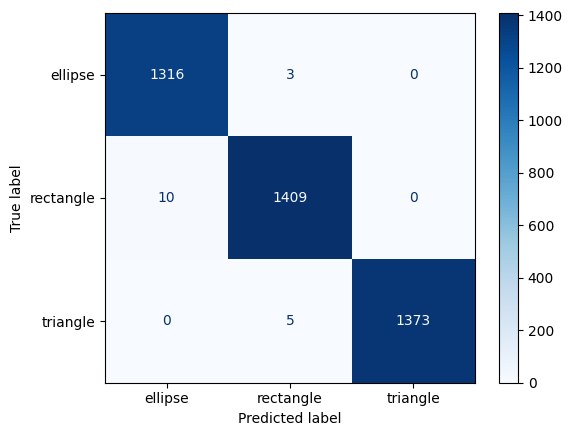

In [22]:
# Confusion matrix test display
ConfusionMatrixDisplay.from_estimator(KNN, X_test, y_test, values_format="d", cmap='Blues', display_labels=shapes)

<font size=5><div dir="rtl">מדידת ROC AUC והצגת גרף ROC AUC למודל KNN</div></font>

Train roc-auc 1.0
Test roc-auc 0.9988914640420999


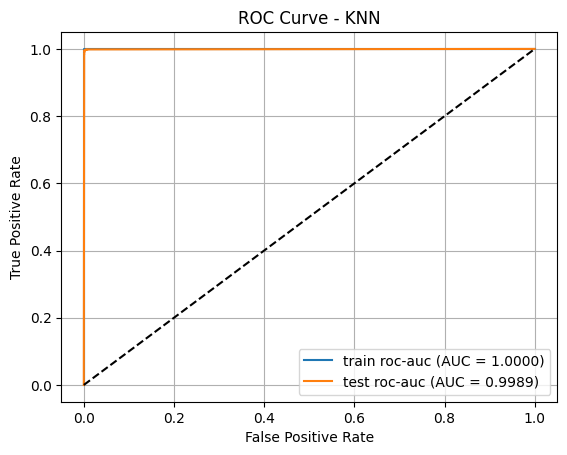

In [290]:
# ROC AUC - KNN
# Train Data
knn_y_train_binary = label_binarize(y_train, classes=np.unique(labels)) # Convert to binary vectors
knn_y_train_proba = KNN.predict_proba(X_train)

# Test Data
knn_y_test_binary = label_binarize(y_test, classes=np.unique(labels)) # Convert to binary vectors
knn_y_test_proba = KNN.predict_proba(X_test)

# ROC AUC Score for train and test
knn_train_auc = roc_auc_score(knn_y_train_binary, knn_y_train_proba)
knn_test_auc = roc_auc_score(knn_y_test_binary, knn_y_test_proba)
print(f'Train roc-auc {knn_train_auc}')
print(f'Test roc-auc {knn_test_auc}')

# ROC AUC Curve
knn_fpr_train, knn_tpr_train, _ = roc_curve(knn_y_train_binary.ravel(), knn_y_train_proba.ravel())
knn_fpr_test, knn_tpr_test, _ = roc_curve(knn_y_test_binary.ravel(), knn_y_test_proba.ravel())

# ROC AUC Graph
plt.plot(knn_fpr_train, knn_tpr_train, label='train roc-auc (AUC = %.4f)' % knn_train_auc)
plt.plot(knn_fpr_test, knn_tpr_test, label='test roc-auc (AUC = %.4f)' % knn_test_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.grid()
plt.show()

<div dir="rtl">בחינת ביצועים בעזרת מדדים נוספים כגון precision, recall, f1-score</div>

In [130]:
# More scores
print(classification_report(y_test, knn_y_test_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9910    0.9985    0.9947      1319
         1.0     0.9958    0.9915    0.9936      1419
         2.0     1.0000    0.9971    0.9985      1378

    accuracy                         0.9956      4116
   macro avg     0.9956    0.9957    0.9956      4116
weighted avg     0.9956    0.9956    0.9956      4116



## <font size=5><h2 dir='rtl' style='text-align: center;' >אימון אלגוריתם Logistic Regression</h2></font>

<font size=5><div dir="rtl">מציאת הפרמטרים הטובים ביותר ואימון המודל Logistic Regression</div></font>

In [125]:
# Training the model by the best hyper-parameteres found
LOGISTIC_REGRESSION = LogisticRegression(max_iter=1000)
# The parameters to choose the best from
grid_params = {'C': [1, 2, 3, 4, 5], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'penalty': ['none', 'l2']}
# Search the best parameteres out of the grid_params dictionary
LOGISTIC_REGRESSION = GridSearchCV(LOGISTIC_REGRESSION, grid_params, cv=5, verbose=0)
LOGISTIC_REGRESSION.fit(X_train, y_train)

# Take the best parameters found
best_C = LOGISTIC_REGRESSION.best_params_['C']
best_solver = LOGISTIC_REGRESSION.best_params_['solver']
best_penalty = LOGISTIC_REGRESSION.best_params_['penalty']

# Train the model again but with the best parameters found
LOGISTIC_REGRESSION = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty, max_iter=1000)
LOGISTIC_REGRESSION.fit(X_train, y_train)

# Hyper Parameters - Logistic Regression
# penalty: the type of regularization to be applied to the model to prevent overfitting
# C: the regularization strength
# solver: the algorithm to use for optimization
# max_iter: limit the number of iterations allowed for the model to converge

C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Magshimim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=1, max_iter=1000, penalty='none')

### <font size=5><h3 dir='rtl' style='text-align: center;' >בחינת ביצועים</h3></font>

In [124]:
# Accuracy Score Test
logistic_regression_y_pred = LOGISTIC_REGRESSION.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)
print(f"Logistic Regression Accuracy Score: {logistic_regression_accuracy} ({logistic_regression_accuracy * 100:.4f}%)")

Logistic Regression Accuracy Score: 0.7988338192419825 (79.8834%)


<font size=5><div dir="rtl">מטריצת בלבול למודל Logistic Regression</div></font>

In [118]:
# Confusion matrix test
confusion_matrix(y_test, logistic_regression_y_pred)

array([[ 932,  351,   36],
       [ 392, 1018,    9],
       [  36,    4, 1338]], dtype=int64)

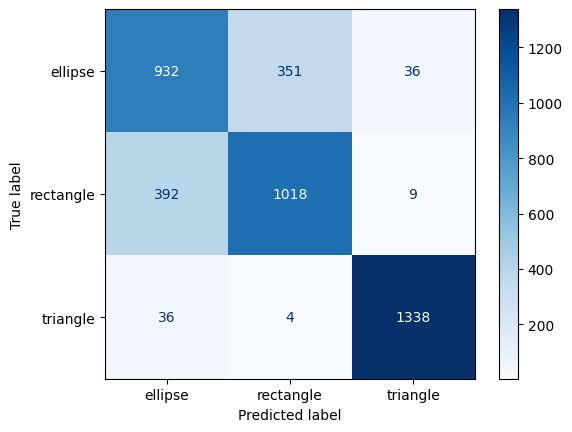

In [119]:
# Confusion matrix test display
ConfusionMatrixDisplay.from_estimator(LOGISTIC_REGRESSION, X_test, y_test, values_format="d", cmap='Blues', display_labels=shapes)

<font size=5><div dir="rtl">מדידת ROC AUC והצגת גרף ROC AUC למודל Logistic Regression</div></font>

Train roc-auc 0.901198829585924
Test roc-auc 0.9054907557816289


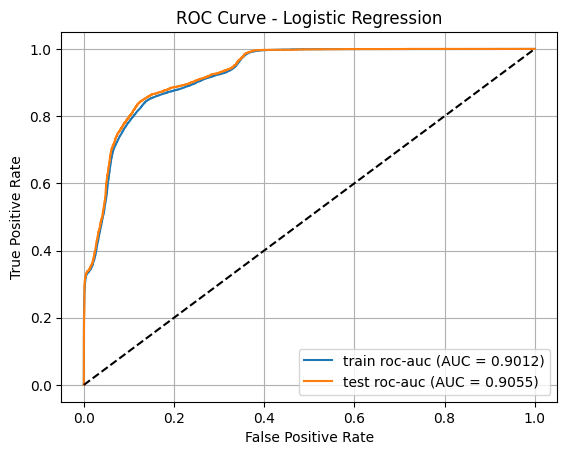

In [291]:
# ROC AUC - Logistic Regression
# Train Data
logreg_y_train_binary = label_binarize(y_train, classes=np.unique(labels)) # Convert to binary vectors
logreg_y_train_proba = LOGISTIC_REGRESSION.predict_proba(X_train)

# Test Data
logreg_y_test_binary = label_binarize(y_test, classes=np.unique(labels)) # Convert to binary vectors
logreg_y_test_proba = LOGISTIC_REGRESSION.predict_proba(X_test)

# ROC AUC Score
logreg_train_auc = roc_auc_score(logreg_y_train_binary, logreg_y_train_proba)
logreg_test_auc = roc_auc_score(logreg_y_test_binary, logreg_y_test_proba)
print(f'Train roc-auc {logreg_train_auc}')
print(f'Test roc-auc {logreg_test_auc}')

# ROC AUC Curve
logreg_fpr_train, logreg_tpr_train, _ = roc_curve(logreg_y_train_binary.ravel(), logreg_y_train_proba.ravel())
logreg_fpr_test, logreg_tpr_test, _ = roc_curve(logreg_y_test_binary.ravel(), logreg_y_test_proba.ravel())

# ROC AUC Graph
plt.plot(logreg_fpr_train, logreg_tpr_train, label='train roc-auc (AUC = %.4f)' % logreg_train_auc)
plt.plot(logreg_fpr_test, logreg_tpr_test, label='test roc-auc (AUC = %.4f)' % logreg_test_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

<font size=5><div dir="rtl">בחינת ביצועים בעזרת מדדים נוספים כגון precision, recall, f1-score</div></font>

In [120]:
# More scores
print(classification_report(y_test, logistic_regression_y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.6853    0.7066    0.6958      1319
         1.0     0.7414    0.7174    0.7292      1419
         2.0     0.9675    0.9710    0.9692      1378

    accuracy                         0.7988      4116
   macro avg     0.7981    0.7983    0.7981      4116
weighted avg     0.7991    0.7988    0.7989      4116



# <font size=5><h1 dir='rtl' style='text-align: center;' >סיכום</h1></font>

### <font size=5><h3 dir='rtl' style='text-align: center;' >סיכום העבודה - מסקנות לגבי הנתונים והאלגוריתם</h3></font>

<font size=5><div dir='rtl'>
הנתונים:
<br>בהתחלה, הנתונים נראו לא נוחים לעבודה בגלל שהיו מסודרים באלפי קבצי <code dir='ltr' >.csv</code> קטנים לכל אחד מהתמונות, אך לאחר סידור הנתונים בקובץ <code dir='ltr' >.csv</code> חדש, הנתונים התגלו כנוחים לעבודה.
<br><br>
בתוך הדאטה, יש שני סוגי קבצים:
<br>
* בתוך הדאטה סט ישנן אלפי תמנות שחור לבן בגודל קבוע של 70 פיקסלים על 70 פיקסלים (70X70) שבהן מצוירות צורות שונות הכוללות, אליפסות ומעגלים, מרובעים ומלבנים, ומשולשים שונים.
כל התמונות מצוירות בכתב יד בסגנונות שונים, לבן על גבי שחור, כדי שלמודל יהיה יותר קל להתאמן ולזהות את הצורות.
<br>
* בנוסף לכך, בדאטה סט יש אלפי קבצי <code dir='ltr' >.csv</code> שבכל אחד מהם מסודרים 4 זוגות של קואורדינטות המביעות את מיקום הקודקודים באופן יחסי (כלומר האחוז מכלל הפיקסלים בו נמצא הקודקוד) ולכל זוג קואורדינטות יש ערך x וערך y.
<br><br>
האלגוריתמים:
<br>
אלגוריתם האימון KNN מספריית sklearn היה נוח לשימוש עם הנתונים שבחרתי, ונתן תוצאות דיוק גבוהות מאוד.
<br>
אלגוריתם האימון Logistic Regression היה נוח לשימוש עם הנתונים שבחרתי, ונתן תוצאות דיוק פחות טובות אך עדיין מספקות.
<br>
האלגוריתמים מקבלים שני dataframes שונים, train ו test. ה dataframes מסודרים על פי labels ונתונים, כאשר הנתונים מביעים את תכונות האיבר שמופיע ב label.
<br>
כמו כן, האלגוריתמים מקבל היפר-פרמטרים שמשנים את אופי המודל ובכך משפיעים על תוצאותיו.

</div></font>

### <font size=5><h3 dir='rtl' style='text-align: center;' >רפקלציה</h3></font>

<font size=5><div dir='rtl' >
תהליך הלמידה היה כיף ולמדתי כמה דברים חדשים.
<br>
ראשית, למדתי כיצד להשתמש בספריות python שונות לסידור ושימוש בנתונים, ספריות ליצירת והצגת גרפים שונים ותוצאות שונות וספריות לחילוק נתונים ואימון מודלים.
<br>
כמו כן, למדתי על אלגוריתם KNN ועל אלגוריתם Logistic Regression וכיצד להשתמש בהם לאימון מודל למידת מכונה, וכיצד לבדוק את אמינותם ודיוקם.
<br>
למדתי על נוסחאות שונות לבדיקת דיוק המודל כמו socre, precision, recall ו f1, בנוסף לטבלת דיוק ניבוי האלגוריתם  confusion matrix ו Roc Auc.
<br><br>
Precision - הסיכוי שהניבוי נכון מכלל הניבויים החיוביים.
<br>
Recall - החלק מהחיוביים האמיתיים שזוהו נכון.
<br>
F1 - הממוצע ההרמוני של precision ו recall. ממוצע הרמוני הוא הממוצע ההופכי של ההופכיים.
<br>
הסברים על ה scores:
</div></font>

![classification_table](https://raw.githubusercontent.com/ItaiAviad/FiguraAI/main/images/classification_table.png)
<br>
![F1](https://raw.githubusercontent.com/ItaiAviad/FiguraAI/main/images/F1.png)
![scores](https://raw.githubusercontent.com/ItaiAviad/FiguraAI/main/images/scores.png)
![scores](https://raw.githubusercontent.com/ItaiAviad/FiguraAI/main/images/PrecisionRecall.png)